# Linear Regression — Geometric View

The goal of this notebook is to understand **linear regression as a geometric problem**.

Instead of treating regression as a formula to memorize, we focus on:
- Vector-based prediction
- The role of direction and slope
- Residuals as geometric error

At this stage, there is:
- No optimization
- No gradient descent
- No cost minimization

Only geometry, intuition, and correctness.


## 1. Linear Model as a Vector Operation

The linear regression model is written as:

$$
\hat{y} = Xw + b
$$

Where:
- $X \in \mathbb{R}^{n \times d}$ represents the input data
- $w \in \mathbb{R}^{d}$ is the weight vector
- $b \in \mathbb{R}$ is the bias term
- $\hat{y} \in \mathbb{R}^{n}$ are the predictions

### Interpretation

- Each row of $X$ corresponds to one data point in feature space
- The vector $w$ defines a direction
- Predictions are obtained by projecting data onto this direction
- The bias term shifts the prediction up or down

At this point, the model parameters are chosen manually.
No learning happens yet.


In [5]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)


## 2. Creating a Simple 1D Dataset

To clearly visualize the geometry, we use a one-dimensional input feature.

This allows:
- Direct plotting
- Easy comparison of different slopes
- Clear visualization of residuals

Noise is added to resemble real-world data.


In [17]:
X = np.linspace(0, 10, 30).reshape(-1, 1)

true_w = np.array([2.0])
true_b = 1.0

noise = np.random.normal(0, 1.0, size=X.shape[0])
y = X @ true_w + true_b + noise
y


array([ 1.62566735,  0.83249762,  1.30841785,  3.55143793,  3.5351579 ,
        5.16227636,  5.61116866,  5.75475729,  5.67044766,  5.69204933,
        7.45003677,  9.44260569,  9.48995581,  8.71977846, 10.82835334,
       11.73014497, 11.15062532, 12.87786304, 13.47200182, 12.96047798,
       15.15089081, 16.04354315, 17.25546504, 17.91587102, 16.17405477,
       17.30355427, 19.44606975, 20.13447561, 20.82539251, 24.85273149])

## 3. Prediction Function

Prediction follows directly from the model equation:

$$
\hat{y} = Xw + b
$$

This function performs only the forward computation.
There is no loss calculation or parameter update.


In [7]:
def predict(X, w, b):
    """
    Compute predictions using a linear model.

    Parameters:
        X : array of shape (n, d)
        w : array of shape (d,)
        b : scalar

    Returns:
        y_hat : array of shape (n,)
    """
    return X @ w + b


Although $b$ is a scalar, NumPy adds it to every element of the vector $Xw$.
This behavior is known as **broadcasting** and is relied upon throughout
vectorized machine learning implementations.


## 4. Choosing Model Parameters Manually

Two sets of parameters are selected:
- One that clearly underfits the data
- One that fits the data reasonably well

This helps isolate model behavior from training.


In [27]:
w_bad = np.array([0.5])
b_bad = 0.0

w_good = np.array([2.0])
b_good = 1.0

y_pred_bad = predict(X, w_bad, b_bad)
y_pred_good = predict(X, w_good, b_good)


## 5. Visualizing the Fits

Each line represents a different choice of direction.
The quality of the fit depends on how well this direction
matches the structure of the data.


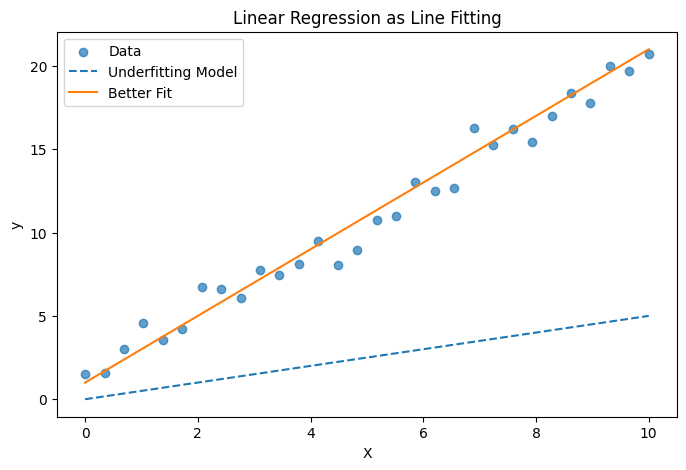

In [9]:
plt.figure(figsize=(8, 5))
plt.scatter(X, y, label="Data", alpha=0.7)
plt.plot(X, y_pred_bad, "--", label="Underfitting Model")
plt.plot(X, y_pred_good, label="Better Fit")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Linear Regression as Line Fitting")
plt.show()


## 6. Residuals

Residuals measure the error made by the model for each data point.

They are defined as:

$$
\text{residual} = \hat{y} - y
$$

Geometrically, each residual is the vertical distance
between the predicted value and the true value.


In [10]:
residuals = y_pred_good - y


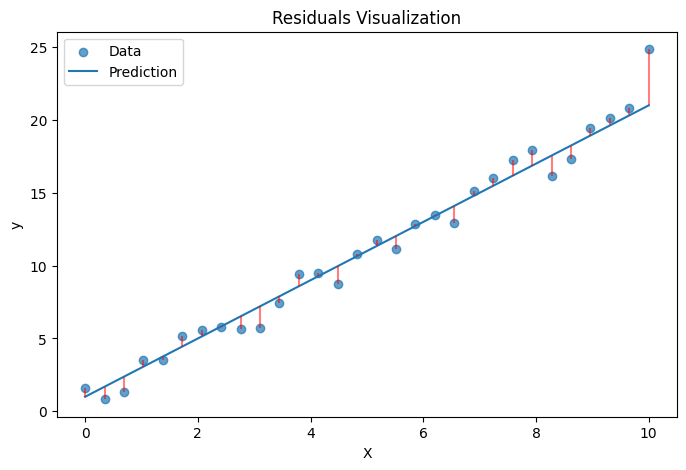

In [34]:
plt.figure(figsize=(8, 5))
plt.scatter(X, y, label="Data", alpha=0.7)
plt.plot(X, y_pred_good, label="Prediction")

for i in range(len(X)):
    plt.vlines(X[i], y[i], y_pred_good[i], colors="red", alpha=0.5)

plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Residuals Visualization")
plt.show()


Each red line represents the error for a single data point.

This raises an important question:

How do we combine all these individual errors into
a single number that represents the overall quality of the model?

This question leads to the idea of a cost function,
which will be explored later.


## 7. Observations

- The weight $w$ controls the orientation of the line
- Changing $w$ rotates the prediction line
- Residuals quantify how far predictions are from actual values
- Linear regression is fundamentally about choosing a good direction

At this stage, everything is visible and interpretable.


## Summary

In this notebook:
- Linear regression was viewed as a geometric operation
- Predictions were computed using vector operations
- Residuals were interpreted as geometric error

This geometric understanding forms the foundation
for learning algorithms such as gradient descent.
